## BOAZ Mini Project

### h1b data [h1b_train, h1b_dev, h1b_test]

- Use h1b __train data__ for train your model.
- Tune your model with __dev data__.
- Finally check your best performed model score with __test data__.
- __*You should clean your train dev test data first!!*__
- Score function : Accuracy
<br>
<br>
- __Your goal is to predict CASE_STATUS, using other features.__
- You can choose the features you want to use in your project.

### Attribute Information

- __CASE_STATUS__
    - The CASE_STATUS field denotes the status of the application after LCA processing. Certified applications are filed with USCIS for H-1B approval.
<br>
<br>
- EMPLOYER_NAME
    - Name of the employer submitting labor condition application.
<br>
<br>
- SOC_NAME
    - Occupational name associated with the SOC_CODE. SOC_CODE is the occupational code associated with the job being requested for temporary labor condition, as classified by the Standard Occupational Classification (SOC) System.
<br>
<br>
- JOB_TITLE
    - Title of the job.
<br>
<br>
- FULL_TIME_POSITION
    - Y = Full Time Position; N = Part Time Position.
<br>
<br>
- PREVAILING_WAGE
    - Prevailing Wage for the job being requested for temporary labor condition. The wage is listed at annual scale in USD. The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment. The prevailing wage is based on the employer’s minimum requirements for the position.
<br>
<br>
- YEAR
    - Year in which the H-1B visa petition was filed.
<br>
<br>

### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
0. Preprocess; normalization, feature selection, etc.
1. Model selection; characteristics of datasets need to be comprehended.
2. Evaluation; This step should be done properly to prevent overfitting problem."
3. Enhancement; parameter tuning and feature selection, etc.

## 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from subprocess import check_output
from matplotlib.ticker import FuncFormatter
%matplotlib inline

## 전처리 & EDA

### X,y로 나누기

In [2]:
df_train = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_train.csv')
df_test = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_test_no_ylabel.csv')
df_dev = pd.read_csv('C://Users/test/Desktop/BOAZ/session/BOAZ Mini Project/h1b_dev.csv')

In [3]:
df_train['TEST'] = '0'

In [4]:
df_test['TEST'] = '1'
df_dev['TEST'] = '0'

In [5]:
print('Number of entries:', df_test.shape[0])

Number of entries: 541560


In [6]:
df_all = pd.concat([df_train, df_test])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [7]:
df_all = pd.concat([df_all, df_dev])

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [8]:
df_ident = df_all['TEST'] == '1'

In [9]:
print('Number of entries:', df_test.shape[0])

Number of entries: 541560


In [10]:
print('Number of entries:', df_all.shape[0])
print(df_all.isnull().sum())

Number of entries: 2944018
CASE_STATUS           541570
EMPLOYER_NAME             50
FULL_TIME_POSITION        12
JOB_TITLE                 38
PREVAILING_WAGE           78
SOC_NAME               17360
TEST                       0
Unnamed: 0                 0
WORKSITE                   0
YEAR                      10
lat                   105188
lon                   105188
dtype: int64


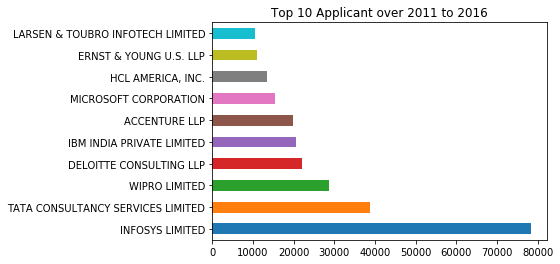

In [5]:
plot1 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh',title="Top 10 Applicant over 2011 to 2016").set_ylabel("")
plt.show()

In [11]:
df_all['SOC_NAME'] = df_all['SOC_NAME'].str.upper()

### 주(state)만 분리하기

In [12]:
def state(data):
    states = []
    data_worksite = df_all['WORKSITE']
    for worksite in data_worksite.iloc[:]:
        state = worksite.split(', ')[1]
        states.append(state)
    return pd.DataFrame(states, columns =['State'])

states = state(df_all)
df_all['State'] = states['State']

In [82]:
df_all['State'].head()

0    CALIFORNIA
1    CALIFORNIA
2    CALIFORNIA
3      ILLINOIS
4      VIRGINIA
Name: State, dtype: object

### case status 확인

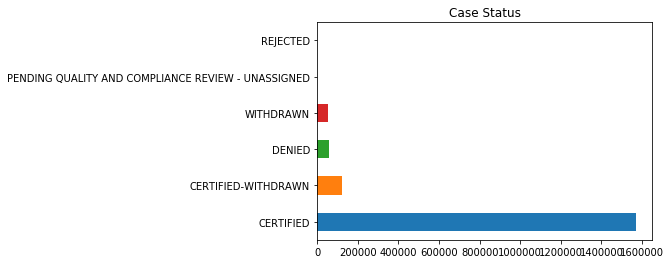

In [10]:
case = df['CASE_STATUS'].value_counts().sort_values(ascending=False).plot.barh()
plt.title('Case Status')
plt.show()

### certified랑 denied만 남기기

In [13]:
df1 = df_all[df_all.CASE_STATUS != 'REJECTED']
df1 = df1[df1.CASE_STATUS != 'WITHDRAWN'] 
df1 = df1[df1.CASE_STATUS != 'CERTIFIED-WITHDRAWN']
df1 = df1[df1.CASE_STATUS != 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']

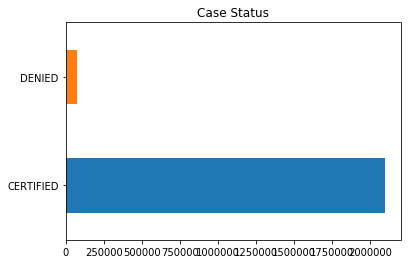

In [14]:
case = df1['CASE_STATUS'].value_counts().sort_values(ascending=False).plot.barh()
plt.title('Case Status')
plt.show()

In [15]:
df1.shape[0]

2709979

In [16]:
df1['CASE_STATUS'].value_counts().sort_values(ascending=False)

CERTIFIED    2092970
DENIED         75439
Name: CASE_STATUS, dtype: int64

### H1B Applicants by Year

(2010, 2017)

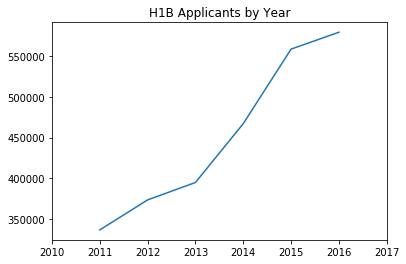

In [17]:
df1['YEAR'].value_counts().sort_values().plot()
plt.title('H1B Applicants by Year')
plt.xlim([2010,2017])

In [19]:
print('Number of entries:', df1.shape[0])
print(df1.isnull().sum())

Number of entries: 2709979
CASE_STATUS           541570
EMPLOYER_NAME             28
FULL_TIME_POSITION        11
JOB_TITLE                 20
PREVAILING_WAGE           63
SOC_NAME               15903
TEST                       0
Unnamed: 0                 0
WORKSITE                   0
YEAR                      10
lat                    97071
lon                    97071
State                      0
dtype: int64


In [179]:
df1.dropna(axis=0, how ='any')

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,State
0,1349742,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",COMPUTER PROGRAMMERS,PROGRAMMER ANALYST,Y,61589.0,2014.0,"SUNNYVALE, CALIFORNIA",-122.036350,37.368830,CALIFORNIA
1,789205,CERTIFIED,GOOGLE INC.,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,SITE RELIABILITY ENGINEER,Y,79144.0,2015.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,CALIFORNIA
2,1617140,CERTIFIED,WIPRO LIMITED,"COMPUTER OCCUPATIONS, ALL OTHER",PROJECT MANAGER,Y,73882.0,2014.0,"EL SEGUNDO, CALIFORNIA",-118.416465,33.919180,CALIFORNIA
3,2757905,CERTIFIED,"CPO SERVICES, INC.",ORTHOTISTS AND PROSTHETISTS,STAFF PROSTHETIST,Y,61589.0,2011.0,"PEORIA, ILLINOIS",-89.588986,40.693649,ILLINOIS
5,693102,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO","MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",ASSISTANT PROJECT SCIENTIST,Y,42120.0,2015.0,"LA JOLLA, CALIFORNIA",-117.271272,32.832811,CALIFORNIA
6,2662510,CERTIFIED,GOOGLE INC.,"COMPUTER SOFTWARE ENGINEERS, APPLICATIONS",SOFTWARE ENGINEER,Y,82035.0,2011.0,"MOUNTAIN VIEW, CALIFORNIA",-122.083851,37.386052,CALIFORNIA
7,636434,CERTIFIED,"COMPREHAB, INC.",PHYSICAL THERAPISTS,PHYSICAL THERAPIST,N,64168.0,2016.0,"GASTONIA, NORTH CAROLINA",-81.187301,35.262082,NORTH CAROLINA
8,2265757,CERTIFIED,JPMORGAN CHASE AND CO.,"SOFTWARE DEVELOPERS, APPLICATIONS",APPLICATIONS DEVELOPER,Y,92726.0,2012.0,"COLUMBUS, OHIO",-82.998794,39.961176,OHIO
9,2927315,CERTIFIED,"IRONBRIDGE CONSULTING, LLC","INFORMATION SECURITY ANALYSTS, WEB DEVELOPERS,...",SOFTWARE ENGINEER/ NETWORK ANALYST,Y,57866.0,2011.0,"ARLINGTON, VIRGINIA",-77.106770,38.879970,VIRGINIA
10,1696111,CERTIFIED,"AXON SOLUTIONS, INC.",COMPUTER SYSTEMS ANALYSTS,MANAGING CONSULTANT,Y,91998.0,2014.0,"UNIVERSAL CITY, CALIFORNIA",-118.350578,34.139769,CALIFORNIA


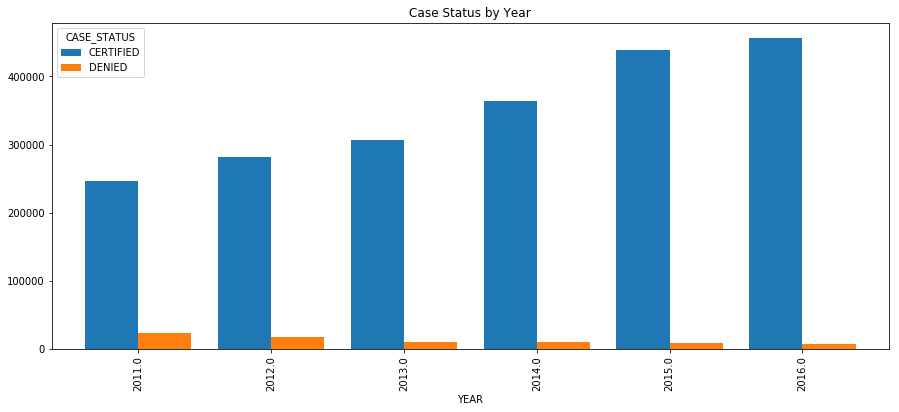

,YEAR,CASE_STATUS,JOB_TITLE
0,2011.0,CERTIFIED,246455
1,2011.0,DENIED,23337
2,2012.0,CERTIFIED,282090
3,2012.0,DENIED,16875
4,2013.0,CERTIFIED,306536
5,2013.0,DENIED,9699
6,2014.0,CERTIFIED,363810
7,2014.0,DENIED,9525
8,2015.0,CERTIFIED,438189
9,2015.0,DENIED,8720


In [20]:
case_year = df1.groupby(['YEAR','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
case_year.pivot('YEAR','CASE_STATUS','JOB_TITLE').plot.bar(width=0.8)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title('Case Status by Year')
plt.show()
case_year

In [21]:
count_cer = case_year.loc[case_year['CASE_STATUS'] == 'CERTIFIED']
count_de = case_year.loc[case_year['CASE_STATUS'] == 'DENIED']

In [22]:
rate = count_cer['JOB_TITLE'].values / (count_cer['JOB_TITLE'].values + count_de['JOB_TITLE'].values)
rate #연도에 따라 certificated 비율이 늘어나고 있다

array([0.91350003, 0.94355527, 0.96932977, 0.97448672, 0.9804882 ,
       0.98428641])

### EMPLOYEER

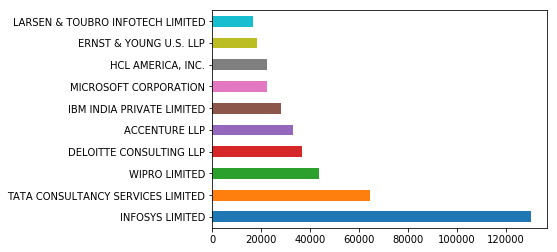

In [23]:
employer = df1['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh()

### 좋은 회사가 certified 비율이 높으려나?

In [60]:
cer_rate = df1[df1['CASE_STATUS'] == 'CERTIFIED']
cer_rate = cer_rate.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
de_rate = df1[df1['CASE_STATUS'] == 'DENIED']
de_rate = de_rate.groupby(['EMPLOYER_NAME','CASE_STATUS'])['YEAR'].count().reset_index()
cer = cer_rate.sort_values('YEAR', ascending = False)[:100]
de = de_rate.sort_values('YEAR',ascending =False)[:100]

In [81]:
cer_rate2 = df1[df1['CASE_STATUS'] == 'CERTIFIED']
cer_rate2 = cer_rate2.groupby(['EMPLOYER_NAME'])['YEAR'].count().reset_index()
de_rate2 = df1[df1['CASE_STATUS'] == 'DENIED']
de_rate2 = de_rate2.groupby(['EMPLOYER_NAME'])['YEAR'].count().reset_index()
cer2 = cer_rate2.sort_values('YEAR', ascending = False)
de2 = de_rate2.sort_values('YEAR',ascending =False)

In [80]:
cer_rate2

,EMPLOYER_NAME,YEAR
0,"""I HAVE A DREAM"" FOUNDATION",1
1,"""K"" LINE AMERICA",4
2,"""K"" LINE AMERICA INC",4
3,"""K"" LINE LOGISITCS (USA) INC",1
4,"""K"" LINE LOGISTICS USA INC",3
5,&QUOT;K&QUOT; LINE AMERICA,1
6,&TV COMMUNICATIONS INC,5
7,'K' LINE LOGISTICS USA INC,4
8,(AMBI)DEXTROUS ASSET MANAGEMENT LLC,1
9,(HOUSEHOLD OF SANDRA SIRUGO & JORGE D JAURY),2


In [82]:
cer_de2 = cer2.merge(de2,left_on = 'EMPLOYER_NAME',right_on = 'EMPLOYER_NAME',how='left').dropna()
cer_de2['Certified_rate'] = cer_de2['YEAR_x']/(cer_de2['YEAR_x']+cer_de2['YEAR_y'])

In [83]:
cer_de2

,EMPLOYER_NAME,YEAR_x,YEAR_y,Certified_rate
0,INFOSYS LIMITED,103967,258.0,0.997525
1,TATA CONSULTANCY SERVICES LIMITED,51342,99.0,0.998075
2,WIPRO LIMITED,34618,158.0,0.995457
3,DELOITTE CONSULTING LLP,28915,440.0,0.985011
4,ACCENTURE LLP,26501,59.0,0.997779
5,IBM INDIA PRIVATE LIMITED,22251,343.0,0.984819
6,MICROSOFT CORPORATION,17834,34.0,0.998097
7,HCL AMERICA INC,17776,77.0,0.995687
8,ERNST & YOUNG US LLP,14370,278.0,0.981021
9,CAPGEMINI AMERICA INC,13381,85.0,0.993688


In [29]:
cer_de.sort_values('Certified_rate',ascending=False)[['EMPLOYER_NAME','Certified_rate']][:10]
#마소가 높다, 모두 95%가 넘는다

,EMPLOYER_NAME,Certified_rate
6,MICROSOFT CORPORATION,0.998097
1,TATA CONSULTANCY SERVICES LIMITED,0.998075
4,ACCENTURE LLP,0.997806
0,INFOSYS LIMITED,0.997525
7,"HCL AMERICA, INC.",0.995675
9,LARSEN & TOUBRO INFOTECH LIMITED,0.995527
2,WIPRO LIMITED,0.995457
10,CAPGEMINI AMERICA INC,0.995327
23,UST GLOBAL INC.,0.993566
26,"HEXAWARE TECHNOLOGIES, INC.",0.993139


# Model

In [25]:
df_final = df1.drop('WORKSITE',axis=1)
df_final = df_final.drop('lon',axis=1)
df_final = df_final.drop('lat',axis=1)

In [26]:
df_final = df_final.iloc[:,1:9]

## SVM

In [145]:
from sklearn.model_selection import train_test_split

In [265]:
df_final = df_final.dropna()

In [266]:
X = df_final.iloc[:,1:8]
y = df_final.iloc[:,0]

In [267]:
y = y.replace('CERTIFIED','1')

In [268]:
y = y.replace('DENIED','0')

In [270]:
X_temp = X.iloc[:,3:6]

In [271]:
X_temp = X_temp.replace('Y','1')

In [272]:
X_temp = X_temp.replace('N','0')

In [273]:
print('Number of entries:', X_temp.shape[0])
print(X_temp.isnull().sum())

Number of entries: 1617233
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
dtype: int64


In [274]:
X_train, X_test, y_train, y_test = train_test_split(X_temp,y,test_size =0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [275]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
def svc():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # 이곳에만 코드를 채우시면 됩니다.
    clf = SVC(C = 1e9, gamma= 1e-07)
    clf.fit(X_train, y_train) # 이곳은 건드릴 필요X
    y_scores = clf.decision_function(X_test) > -220
    confusion_matrix = confusion_matrix(y_test,y_scores)

    return confusion_matrix # 정답 리턴

svc()

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) #분류 문제에서는 0.5에서 랜덤으로 분류해서 고정해야되니까)
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
##Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

## Random Forest

In [89]:
df1.to_csv('yonsik.csv')

#### 명목변수 변환
1.   Employer name – , 랑 . 없애서 통합 – certified rate를 정규화
2.   SOC_NAME – 현재 upper까지 했고, 직업 이름 뒤에 S 붙는 애들 없애기 – certified rate 정규화
3.   JOB_TITLE은 SOC_NAME이랑 공선성 있다고 의심, 일단 넣고 나중에 빼보기
4.   FULL_TIME_POSITION -> 1,0
5.   Prevailing_wage – 정규화
6.   YEAR – dummy 변수로
7.   Worksite, lon, lat -> State
l   train에는 있고, test에는 없는 명목형 변수 어떻게 처리 ?

In [16]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,TEST,Unnamed: 0,WORKSITE,YEAR,lat,lon,State
0,CERTIFIED,"INTERNATIONAL SYSTEMS TECHNOLOGIES, INC.",Y,PROGRAMMER ANALYST,61589.0,COMPUTER PROGRAMMERS,0,1349742,"SUNNYVALE, CALIFORNIA",2014.0,37.368830,-122.036350,CALIFORNIA
1,CERTIFIED,GOOGLE INC.,Y,SITE RELIABILITY ENGINEER,79144.0,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,0,789205,"SAN FRANCISCO, CALIFORNIA",2015.0,37.774929,-122.419415,CALIFORNIA
2,CERTIFIED,WIPRO LIMITED,Y,PROJECT MANAGER,73882.0,"COMPUTER OCCUPATIONS, ALL OTHER",0,1617140,"EL SEGUNDO, CALIFORNIA",2014.0,33.919180,-118.416465,CALIFORNIA
3,CERTIFIED,"CPO SERVICES, INC.",Y,STAFF PROSTHETIST,61589.0,ORTHOTISTS AND PROSTHETISTS,0,2757905,"PEORIA, ILLINOIS",2011.0,40.693649,-89.588986,ILLINOIS
5,DENIED,"UNIVERSITY OF CALIFORNIA, SAN DIEGO",Y,ASSISTANT PROJECT SCIENTIST,42120.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",0,693102,"LA JOLLA, CALIFORNIA",2015.0,32.832811,-117.271272,CALIFORNIA


In [30]:
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.replace('.','')

In [35]:
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.replace(',','')

In [31]:
df1['FULL_TIME_POSITION'] = df1['FULL_TIME_POSITION'].replace('Y','1')
df1['FULL_TIME_POSITION'] = df1['FULL_TIME_POSITION'].replace('N','0')

In [65]:
df1.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,TEST,Unnamed: 0,WORKSITE,YEAR,lat,lon,State,PREVAILING_WAGE1
0,CERTIFIED,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,1,PROGRAMMER ANALYST,61589.0,COMPUTER PROGRAMMERS,0,1349742,"SUNNYVALE, CALIFORNIA",2014.0,37.368830,-122.036350,CALIFORNIA,-0.015817
1,CERTIFIED,GOOGLE INC,1,SITE RELIABILITY ENGINEER,79144.0,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,0,789205,"SAN FRANCISCO, CALIFORNIA",2015.0,37.774929,-122.419415,CALIFORNIA,-0.012609
2,CERTIFIED,WIPRO LIMITED,1,PROJECT MANAGER,73882.0,"COMPUTER OCCUPATIONS, ALL OTHER",0,1617140,"EL SEGUNDO, CALIFORNIA",2014.0,33.919180,-118.416465,CALIFORNIA,-0.013571
3,CERTIFIED,CPO SERVICES INC,1,STAFF PROSTHETIST,61589.0,ORTHOTISTS AND PROSTHETISTS,0,2757905,"PEORIA, ILLINOIS",2011.0,40.693649,-89.588986,ILLINOIS,-0.015817
5,DENIED,UNIVERSITY OF CALIFORNIA SAN DIEGO,1,ASSISTANT PROJECT SCIENTIST,42120.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",0,693102,"LA JOLLA, CALIFORNIA",2015.0,32.832811,-117.271272,CALIFORNIA,-0.019374


In [37]:
np.mean(df1['PREVAILING_WAGE'])

148152.2998651202

In [38]:
df1['PREVAILING_WAGE1'] = (df1['PREVAILING_WAGE'] - np.mean(df1['PREVAILING_WAGE'])) / np.std(df1['PREVAILING_WAGE'])

In [39]:
np.mean(df1['PREVAILING_WAGE1'])

-2.9988344101337636e-16

In [66]:
cer_de.head()

,EMPLOYER_NAME,CASE_STATUS_x,YEAR_x,CASE_STATUS_y,YEAR_y,Certified_rate
0,INFOSYS LIMITED,CERTIFIED,103967,DENIED,258.0,0.997525
1,TATA CONSULTANCY SERVICES LIMITED,CERTIFIED,51342,DENIED,99.0,0.998075
2,WIPRO LIMITED,CERTIFIED,34618,DENIED,158.0,0.995457
3,DELOITTE CONSULTING LLP,CERTIFIED,28915,DENIED,440.0,0.985011
4,ACCENTURE LLP,CERTIFIED,26501,DENIED,59.0,0.997779


In [84]:
cer_dee = cer_de2['EMPLOYER_NAME']

In [85]:
cer_dee = pd.concat([cer_dee,cer_de2['Certified_rate']],axis=1)
cer_dee.head()

,EMPLOYER_NAME,Certified_rate
0,INFOSYS LIMITED,0.997525
1,TATA CONSULTANCY SERVICES LIMITED,0.998075
2,WIPRO LIMITED,0.995457
3,DELOITTE CONSULTING LLP,0.985011
4,ACCENTURE LLP,0.997779


In [86]:
df2 = pd.merge(df1,cer_dee,how='left')

In [87]:
df2.isnull().sum()

CASE_STATUS           541570
EMPLOYER_NAME             28
FULL_TIME_POSITION        11
JOB_TITLE                 20
PREVAILING_WAGE           63
SOC_NAME               15903
TEST                       0
Unnamed: 0                 0
WORKSITE                   0
YEAR                      10
lat                    97071
lon                    97071
State                      0
PREVAILING_WAGE1          63
Certified_rate        704030
dtype: int64

In [102]:
df2.rename(columns = {df2.columns[14] : 'CR_EMPLOYER'}, inplace = True )

In [103]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,TEST,Unnamed: 0,WORKSITE,YEAR,lat,lon,State,PREVAILING_WAGE1,CR_EMPLOYER
0,CERTIFIED,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,1,PROGRAMMER ANALYST,61589.0,COMPUTER PROGRAMMERS,0,1349742,"SUNNYVALE, CALIFORNIA",2014.0,37.368830,-122.036350,CALIFORNIA,-0.015817,0.997976
1,CERTIFIED,GOOGLE INC,1,SITE RELIABILITY ENGINEER,79144.0,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,0,789205,"SAN FRANCISCO, CALIFORNIA",2015.0,37.774929,-122.419415,CALIFORNIA,-0.012609,0.984573
2,CERTIFIED,WIPRO LIMITED,1,PROJECT MANAGER,73882.0,"COMPUTER OCCUPATIONS, ALL OTHER",0,1617140,"EL SEGUNDO, CALIFORNIA",2014.0,33.919180,-118.416465,CALIFORNIA,-0.013571,0.995457
3,CERTIFIED,CPO SERVICES INC,1,STAFF PROSTHETIST,61589.0,ORTHOTISTS AND PROSTHETISTS,0,2757905,"PEORIA, ILLINOIS",2011.0,40.693649,-89.588986,ILLINOIS,-0.015817,NaN
4,DENIED,UNIVERSITY OF CALIFORNIA SAN DIEGO,1,ASSISTANT PROJECT SCIENTIST,42120.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",0,693102,"LA JOLLA, CALIFORNIA",2015.0,32.832811,-117.271272,CALIFORNIA,-0.019374,0.972019


In [105]:
df2['CR_EMPLOYER_RE'] = (df2['CR_EMPLOYER'] - np.mean(df2['CR_EMPLOYER'])) / np.std(df2['CR_EMPLOYER'])

In [106]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,TEST,Unnamed: 0,WORKSITE,YEAR,lat,lon,State,PREVAILING_WAGE1,CR_EMPLOYER,CR_EMPLOYER_RE
0,CERTIFIED,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,1,PROGRAMMER ANALYST,61589.0,COMPUTER PROGRAMMERS,0,1349742,"SUNNYVALE, CALIFORNIA",2014.0,37.368830,-122.036350,CALIFORNIA,-0.015817,0.997976,0.404204
1,CERTIFIED,GOOGLE INC,1,SITE RELIABILITY ENGINEER,79144.0,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,0,789205,"SAN FRANCISCO, CALIFORNIA",2015.0,37.774929,-122.419415,CALIFORNIA,-0.012609,0.984573,0.258826
2,CERTIFIED,WIPRO LIMITED,1,PROJECT MANAGER,73882.0,"COMPUTER OCCUPATIONS, ALL OTHER",0,1617140,"EL SEGUNDO, CALIFORNIA",2014.0,33.919180,-118.416465,CALIFORNIA,-0.013571,0.995457,0.376880
3,CERTIFIED,CPO SERVICES INC,1,STAFF PROSTHETIST,61589.0,ORTHOTISTS AND PROSTHETISTS,0,2757905,"PEORIA, ILLINOIS",2011.0,40.693649,-89.588986,ILLINOIS,-0.015817,NaN,NaN
4,DENIED,UNIVERSITY OF CALIFORNIA SAN DIEGO,1,ASSISTANT PROJECT SCIENTIST,42120.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",0,693102,"LA JOLLA, CALIFORNIA",2015.0,32.832811,-117.271272,CALIFORNIA,-0.019374,0.972019,0.122662


In [107]:
df2['PREVAILING_WAGE_RE'] = (df2['PREVAILING_WAGE'] - np.mean(df2['PREVAILING_WAGE'])) / np.std(df2['PREVAILING_WAGE'])

In [108]:
df2.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,JOB_TITLE,PREVAILING_WAGE,SOC_NAME,TEST,Unnamed: 0,WORKSITE,YEAR,lat,lon,State,PREVAILING_WAGE1,CR_EMPLOYER,CR_EMPLOYER_RE,PREVAILING_WAGE_RE
0,CERTIFIED,INTERNATIONAL SYSTEMS TECHNOLOGIES INC,1,PROGRAMMER ANALYST,61589.0,COMPUTER PROGRAMMERS,0,1349742,"SUNNYVALE, CALIFORNIA",2014.0,37.368830,-122.036350,CALIFORNIA,-0.015817,0.997976,0.404204,-0.015817
1,CERTIFIED,GOOGLE INC,1,SITE RELIABILITY ENGINEER,79144.0,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,0,789205,"SAN FRANCISCO, CALIFORNIA",2015.0,37.774929,-122.419415,CALIFORNIA,-0.012609,0.984573,0.258826,-0.012609
2,CERTIFIED,WIPRO LIMITED,1,PROJECT MANAGER,73882.0,"COMPUTER OCCUPATIONS, ALL OTHER",0,1617140,"EL SEGUNDO, CALIFORNIA",2014.0,33.919180,-118.416465,CALIFORNIA,-0.013571,0.995457,0.376880,-0.013571
3,CERTIFIED,CPO SERVICES INC,1,STAFF PROSTHETIST,61589.0,ORTHOTISTS AND PROSTHETISTS,0,2757905,"PEORIA, ILLINOIS",2011.0,40.693649,-89.588986,ILLINOIS,-0.015817,NaN,NaN,-0.015817
4,DENIED,UNIVERSITY OF CALIFORNIA SAN DIEGO,1,ASSISTANT PROJECT SCIENTIST,42120.0,"MEDICAL SCIENTISTS, EXCEPT EPIDEMIOLOGISTS",0,693102,"LA JOLLA, CALIFORNIA",2015.0,32.832811,-117.271272,CALIFORNIA,-0.019374,0.972019,0.122662,-0.019374


In [109]:
YEAR_OHE = pd.get_dummies(df2.YEAR)

In [112]:
STATE_OHE = pd.get_dummies(df2.State)

In [115]:
df3 = pd.concat([df2,YEAR_OHE],axis=1)

In [118]:
df3 = pd.concat([df3,STATE_OHE],axis=1)

In [117]:
df3.shape[0]

2709979

In [119]:
del df3['CASE_STATUS']

In [120]:
del df3['EMPLOYER_NAME']

In [121]:
del df3['JOB_TITLE']

In [122]:
del df3['SOC_NAME']

In [123]:
del df3['WORKSITE']

In [124]:
del df3['lat']

In [125]:
del df3['lon']

In [126]:
df3.to_csv('yonsik2.csv')